# Tratamiento de Datos Atípicos y Faltantes en Análisis de Datos

## 1. Introducción

En la era del *big data*, la calidad de los datos se ha convertido en una de las cosas más importantes para construir modelos analíticos confiables. **Datos atípicos (outliers)** y **valores faltantes** representan dos de los desafíos más comunes que comprometen la integridad de los análisis, pudiendo distorsionar:
- Estimaciones estadísticas
- Patrones en modelos de machine learning
- Conclusiones en investigación científica

Estudios del [Instituto Nacional de Estándares y Tecnología (NIST)](https://www.nist.gov/) revelan que el **62% de los errores en modelos predictivos** se originan en problemas de calidad de datos no tratados. Además, regulaciones como el **GDPR (Artículo 5)** y estándares como **ISO 8000** exigen protocolos documentados para el manejo de datos incompletos o anómalos.

**Objetivos de esta investigación**:
1. Clasificar tipos de datos atípicos y faltantes
2. Evaluar métodos de detección y tratamiento
3. Proporcionar implementaciones prácticas en Python
4. Establecer recomendaciones basadas en evidencia

## 2. Marco Teórico

### 2.1 Datos Atípicos (Outliers)

**Definición**: Observaciones que se desvían significativamente del resto de la distribución (Hawkins, 1980).
**Clasificación**:
- **Univariados**: Anomalías en una sola dimensión. Es decir, valores extremos en una variable.
- **Multivariados**: Combinaciones inusuales entre variables. Por ejemplo, un alto ingreso con baja edad.

**Algunas de las Causas**:
- Errores de medición (sensores defectuosos)
- Entradas legítimas pero extremas (transacciones fraudulentas)
- Errores de procesamiento (decimales mal ubicados)

**Métodos de Detección**:
| Método         | Técnica                          | Ventajas                                                                 | Desventajas                                                                 | Casos de Uso Recomendados                                                                 |
|----------------|----------------------------------|--------------------------------------------------------------------------|-----------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| **Estadístico**| Z-score                         | - Fácil de implementar<br>- Rápido para datos unimodales                 | - Asume distribución normal<br>- No funciona bien con datos multimodales    | Datos con distribución cercana a la normal (ej: alturas, pesos)                          |
|                | IQR (Rango Intercuartílico)     | - Robustez a outliers<br>- No depende de la distribución                 | - Solo detecta outliers univariados<br>- Menos sensible en datos dispersos  | Datos con colas pesadas o asimetría (ej: ingresos, tiempos de espera)                    |
| **Visual**     | Boxplots                       | - Identificación intuitiva<br>- Útil para comparar distribuciones        | - Limitado a una o dos variables<br>- Subjetivo en la interpretación        | Análisis exploratorio inicial (ej: comparar distribuciones entre grupos)                 |
|                | Gráficos de dispersión (Scatter)| - Detecta outliers multivariados<br>- Visualiza relaciones entre variables| - Difícil de interpretar con muchas variables<br>- Requiere datos limpios   | Detección de relaciones no lineales o agrupaciones (ej: análisis de clusters)            |
| **Automático** | Isolation Forest               | - Efectivo en alta dimensión<br>- No requiere suposiciones de distribución| - Computacionalmente costoso<br>- Sensible a la elección de hiperparámetros | Detección de outliers en datasets grandes y complejos (ej: fraudes, fallos de equipos)   |
|                | DBSCAN                         | - Detecta outliers y clusters<br>- Robustez a la forma de los clusters   | - Sensible a la elección de parámetros (eps, min_samples)<br>- Lento en grandes datasets | Datos con agrupaciones naturales (ej: segmentación de clientes, detección de anomalías)  |
| **Híbrido**    | LOF (Local Outlier Factor)      | - Detecta outliers locales<br>- Útil en datos con densidad variable      | - Computacionalmente intensivo<br>- Difícil de interpretar en alta dimensión| Datos con patrones de densidad irregular (ej: detección de intrusos en redes)            |
|                | One-Class SVM                  | - Efectivo para datos no lineales<br>- Útil cuando solo se tienen datos "normales" | - Requiere ajuste de hiperparámetros<br>- Lento en grandes datasets         | Detección de anomalías en sistemas de monitoreo (ej: fallos en máquinas, fraudes)        |

**Técnicas de Tratamiento**:
- **Eliminación**:
Solo para errores comprobados, consiste en eliminar la observación. No es recomendable debido a la pérdida de información.
Ejemplo: Eliminar valores negativos en una variable de edad.

- **Transformación**:
Aplicar funciones matemáticas (log, raíz cuadrada, etc.) para reducir el impacto de los outliers sin eliminarlos. Útil para datos con colas pesadas o asimetría.
Ejemplo: Aplicar logaritmo a una variable de ingresos para reducir el efecto de valores extremos.

- **Discretización**:
Convertir valores continuos en intervalos o categorías. Reduce el efecto de outliers, pero puede causar pérdida de precisión.
Ejemplo: Agrupar edades en rangos como "18-25", "26-35", etc.

- **Winsorizing**:
Reemplazar los valores extremos con los percentiles especificados (ej: 5% y 95%). Conserva la forma de la distribución sin eliminar datos.
Ejemplo: Limitar los valores de una variable de precios al percentil 95%.

- **Modelos Robustos**:
Usar algoritmos menos sensibles a outliers, como Regresión Huber o Random Forests. No requiere modificar los datos, pero puede ser más costoso computacionalmente.
Ejemplo: Usar Random Forests para predecir valores en un dataset con muchos outliers.

### 2.2 Datos Faltantes

Los datos faltantes son un problema común en conjuntos de datos reales y pueden afectar significativamente los resultados de los análisis. Según Rubin (1976), los datos faltantes se clasifican en tres categorías principales:

1. **MCAR** (Missing Completely at Random): La probabilidad de que un valor falte es independiente de los datos observados y no observados.
Ejemplo: Un sensor que falla aleatoriamente sin relación con las condiciones del entorno.
2. **MAR** (Missing at Random): La probabilidad de que un valor falte depende de los datos observados.
Ejemplo: En una encuesta de ingresos, es más probable que las personas con ingresos altos no respondan, pero esto depende de otras variables observadas (como la edad o el nivel educativo).  
3. **MNAR** (Missing Not at Random): La probabilidad de que un valor falte depende de los datos no observados.  
Ejemplo: En un estudio médico, los pacientes con síntomas graves pueden ser menos propensos a reportar su condición.

**Patrones**:
- Monotónico: Los datos faltantes siguen un patrón secuencial (ej: una encuesta abandonada después de cierta pregunta)
- Arbitrario: Los datos faltantes no siguen un patrón claro (ej: fallos aleatorios en sensores).
- Bloque: Un conjunto completo de variables falta para ciertas observaciones (ej: falta de registros en un período específico).

#### Métodos de Manejo de Datos Faltantes
##### 1. Eliminación
- **Listwise Deletion**: Eliminar todas las observaciones con valores faltantes.
  **Ventaja**: Simple de implementar.
  **Desventaja**: Pérdida significativa de información si hay muchos datos faltantes.
- **Pairwise Deletion**: Usar solo los datos disponibles para cada cálculo.  
  **Ventaja**: Maximiza el uso de los datos.  
  **Desventaja**: Puede introducir sesgos en los análisis.

##### 2. Imputación Simple
- **Media/Mediana/Moda**: Reemplazar los valores faltantes con la media, mediana o moda de la variable.  
  **Ventaja**: Fácil de implementar.  
  **Desventaja**: Subestima la varianza y distorsiona la distribución.
- **Valor Constante**: Reemplazar con un valor fijo (ej: 0 o "Desconocido").  
  **Ventaja**: Útil para variables categóricas.  
  **Desventaja**: Puede introducir sesgos.

##### 3. Imputación Avanzada
- **MICE (Multiple Imputation by Chained Equations)**:  
  Un método iterativo que usa regresiones para imputar valores faltantes.  
  **Ventaja**: Captura la incertidumbre de la imputación.  
  **Desventaja**: Computacionalmente costoso.
  ```python
  from sklearn.experimental import enable_iterative_imputer
  from sklearn.impute import IterativeImputer
  imputer = IterativeImputer(max_iter=10, random_state=0)
  data_imputed = imputer.fit_transform(data)

## 3. Aplicación Práctica

Importamos las librerías necesarias.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.impute import IterativeImputer
from sklearn.datasets import fetch_openml
from sklearn.ensemble import IsolationForest
import missingno as msno

### 3.1 Detección y Tratamiento de Outliers

#### Descripción de las columnas del conjunto de datos 'mpg'

El conjunto de datos `'mpg'` contiene información sobre diferentes modelos de automóviles, incluyendo detalles sobre su rendimiento y características técnicas. Las columnas son las siguientes:

1. **mpg**: Millas por galón (millas recorridas por cada galón de combustible).

2. **cylinders**: Número de cilindros del motor del vehículo.

3. **displacement**: Desplazamiento del motor (en pulgadas cúbicas).

4. **horsepower**: Potencia del motor medida en caballos de fuerza.

5. **weight**: Peso del automóvil (en libras).

6. **acceleration**: Aceleración del vehículo (en metros por segundo cuadrado).

7. **model_year**: Año del modelo del automóvil.

8. **origin**: Región de origen del vehículo (1 = USA, 2 = Europa, 3 = Japón).

9. **name**: Nombre del automóvil.

In [3]:
data = sns.load_dataset('mpg').dropna()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### Detección de Outliers:

- **Visual: A través de BoxPlot**

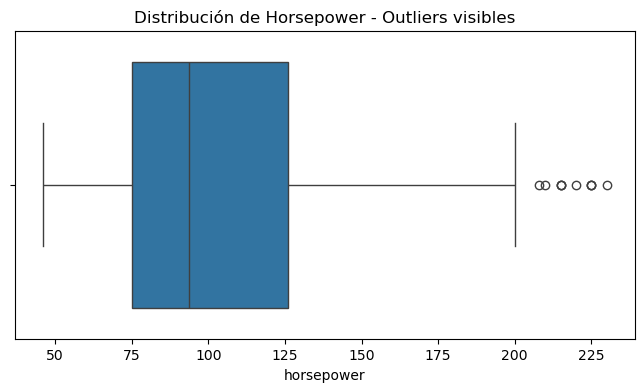

In [4]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['horsepower'])
plt.title("Distribución de Horsepower - Outliers visibles")
plt.show()

- **Algoritmos Automáticos: Isolation Forest**

    El código usa el algoritmo Isolation Forest para detectar valores atípicos en la columna `'horsepower'`. Con una tasa de contaminación del 5%, el modelo identifica los datos atípicos, los marca con -1 en una nueva columna llamada `'anomaly'`, y luego imprime el número de valores atípicos detectados.

In [5]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[['horsepower']])
outliers_iso = data[data['anomaly'] == -1]
print(f"Outliers detectados con Isolation Forest: {len(outliers_iso)}")

Outliers detectados con Isolation Forest: 20


#### Tratamiento de Outliers:

- **Transformación con Winsorizing**

    En este fragmento de código se aplica una transformación de Winsorizing a la columna `'horsepower'` para manejar los datos atípicos.

    El método `winsorize` limita los valores en los extremos (los percentiles inferiores y superiores) para reducir la influencia de los valores atípicos. En este caso, se establece un límite del 5% en ambos extremos, lo que significa que los valores fuera del 5% inferior y superior serán reemplazados por los valores más cercanos dentro de ese rango.

    Después de aplicar esta transformación, se crea un DataFrame que compara los datos originales con los datos transformados y se muestran las estadísticas descriptivas de ambas columnas.

In [6]:
winsorized_data = winsorize(data['horsepower'], limits=[0.05, 0.05])
pd.DataFrame({'Original': data['horsepower'], 'Winsorized': winsorized_data}).describe()

,Original,Winsorized
count,392.000000,392.000000
mean,104.469388,103.561224
std,38.491160,34.867617
min,46.000000,60.000000
25%,75.000000,75.000000
50%,93.500000,93.500000
75%,126.000000,126.000000
max,230.000000,180.000000


Podemos ver que varios datos estadísticos han cambiado de manera significativa, despues de haber manejado los datos atípicos. Lo que indica que el tratamiento de estos datos ha tenido un impacto en la dsitribución de los datos, lo que puede mejorar la precisión de los análisis que se pueden realizar a futuro

### 3.1 Detección y Manejo de datos incompletos

#### Descripción del conjunto de datos Titanic

Este dataset contiene información sobre los pasajeros del Titanic y si sobrevivieron o no al desastre. Las columnas son las siguientes:

1. **pclass**: Clase del pasajero (1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase).

2. **sex**: Sexo del pasajero (masculino o femenino).

2. **nombre**: Nombre del pasajero (Nombre y Apellido).

3. **Age**: Edad del pasajero en años.

4. **sibsp**: Número de hermanos o cónyuges a bordo del Titanic.

5. **parch**: Número de padres o hijos a bordo del Titanic.

6. **fare**: Tarifa pagada por el pasajero para su boleto.

7. **embarked**: Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton).

8. **ticket**: Número de boleto del pasajero.

9. **cabin**: Número de cabina del pasajero (puede tener valores nulos).

10. **boat**: Número de bote salvavidas en el que viajaba el pasajero (puede tener valores nulos).

11. **body**: Número de cuerpo recuperado (si se encontró, de lo contrario nulo).

12. **home.dest**: Destino o lugar de residencia del pasajero.


In [8]:
titanic_df = fetch_openml('titanic', version=1, as_frame=True)['data']
titanic_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Determinar datos faltantes

Vamos a determinar cuantos datos faltantes hay en nuestra base de datos. Para este fin primero vamos a usar un **gráfico de matriz de valores nulos** de la libreria  ```missingno```, que muestra la distribución de datos faltantes en el conjunto de datos. En este gráfico, los espacios en blanco indican datos faltantes, esto en cada columna de la base de datos.

<Axes: >

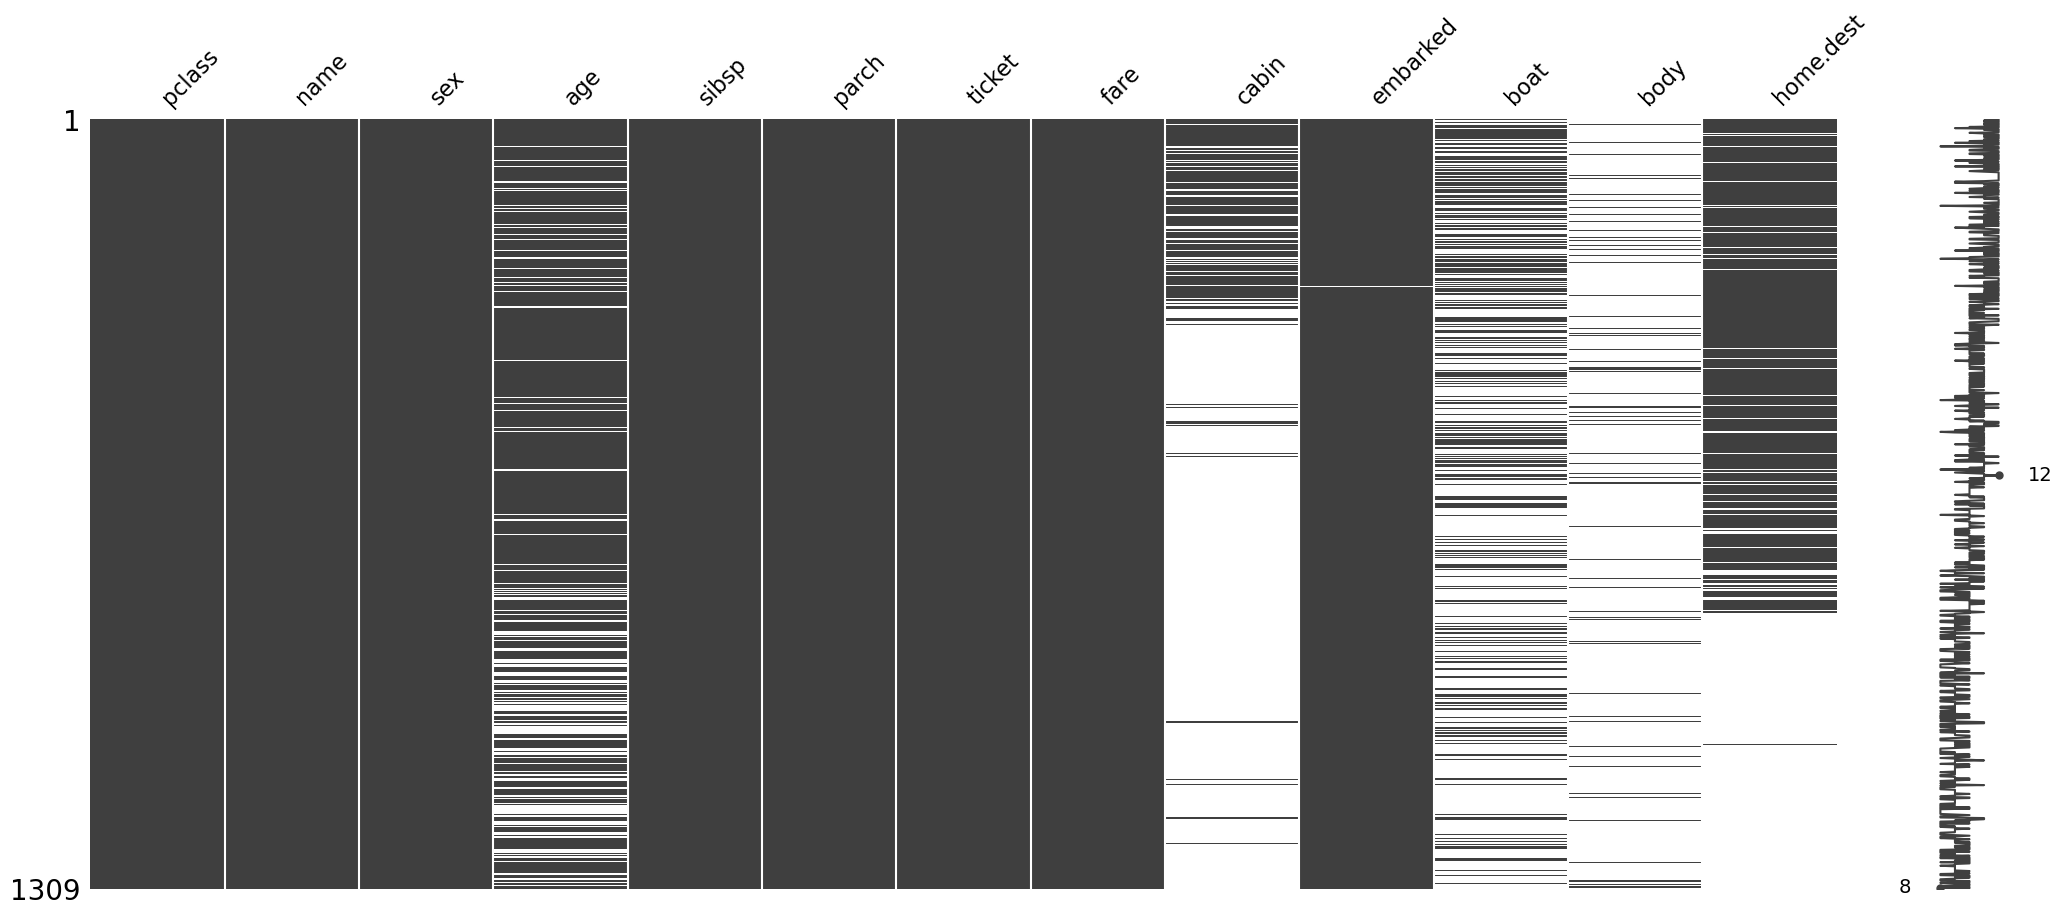

In [9]:
msno.matrix(titanic_df)

Como se puede observar en el gráfico, la base de datos tiene datos faltantes en varias columnas. Ahora, para comprender mejor estos datos faltantes, en el siguiente bloque de código determinamos cuántos datos faltantes hay en cada columna.

In [10]:
titanic_df.isna().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

#### Manejo de datos incompletos:

Esto es un problema porque los datos faltantes pueden afectar la calidad del análisis y la precisión de los modelos, por lo que es necesario tratarlos adecuadamente para evitar sesgos o errores en los resultados.

####  Imputación con MICE (Iterative Imputer)

El código utiliza el **IterativeImputer** para manejar los datos faltantes en las columnas numéricas del conjunto de datos Titanic. Primero, selecciona las columnas numéricas, luego estima los valores faltantes basándose en las demás columnas, repitiendo este proceso hasta 10 veces. Esto permite obtener un conjunto de datos completo, mejorando así la calidad del análisis y evitando que los valores faltantes afecten los resultados.

In [11]:
imputer = IterativeImputer(max_iter=10, random_state=0)
titanic_numeric = titanic_df.select_dtypes(include=[np.number])
titanic_imputed = pd.DataFrame(imputer.fit_transform(titanic_numeric), columns=titanic_numeric.columns)
titanic_imputed.head()

,pclass,age,sibsp,parch,fare,body
0,1.0,29.0000,0.0,0.0,211.3375,160.644389
1,1.0,0.9167,1.0,2.0,151.5500,160.688450
2,1.0,2.0000,1.0,2.0,151.5500,160.688842
3,1.0,30.0000,1.0,2.0,151.5500,135.000000
4,1.0,25.0000,1.0,2.0,151.5500,160.697182


<Axes: >

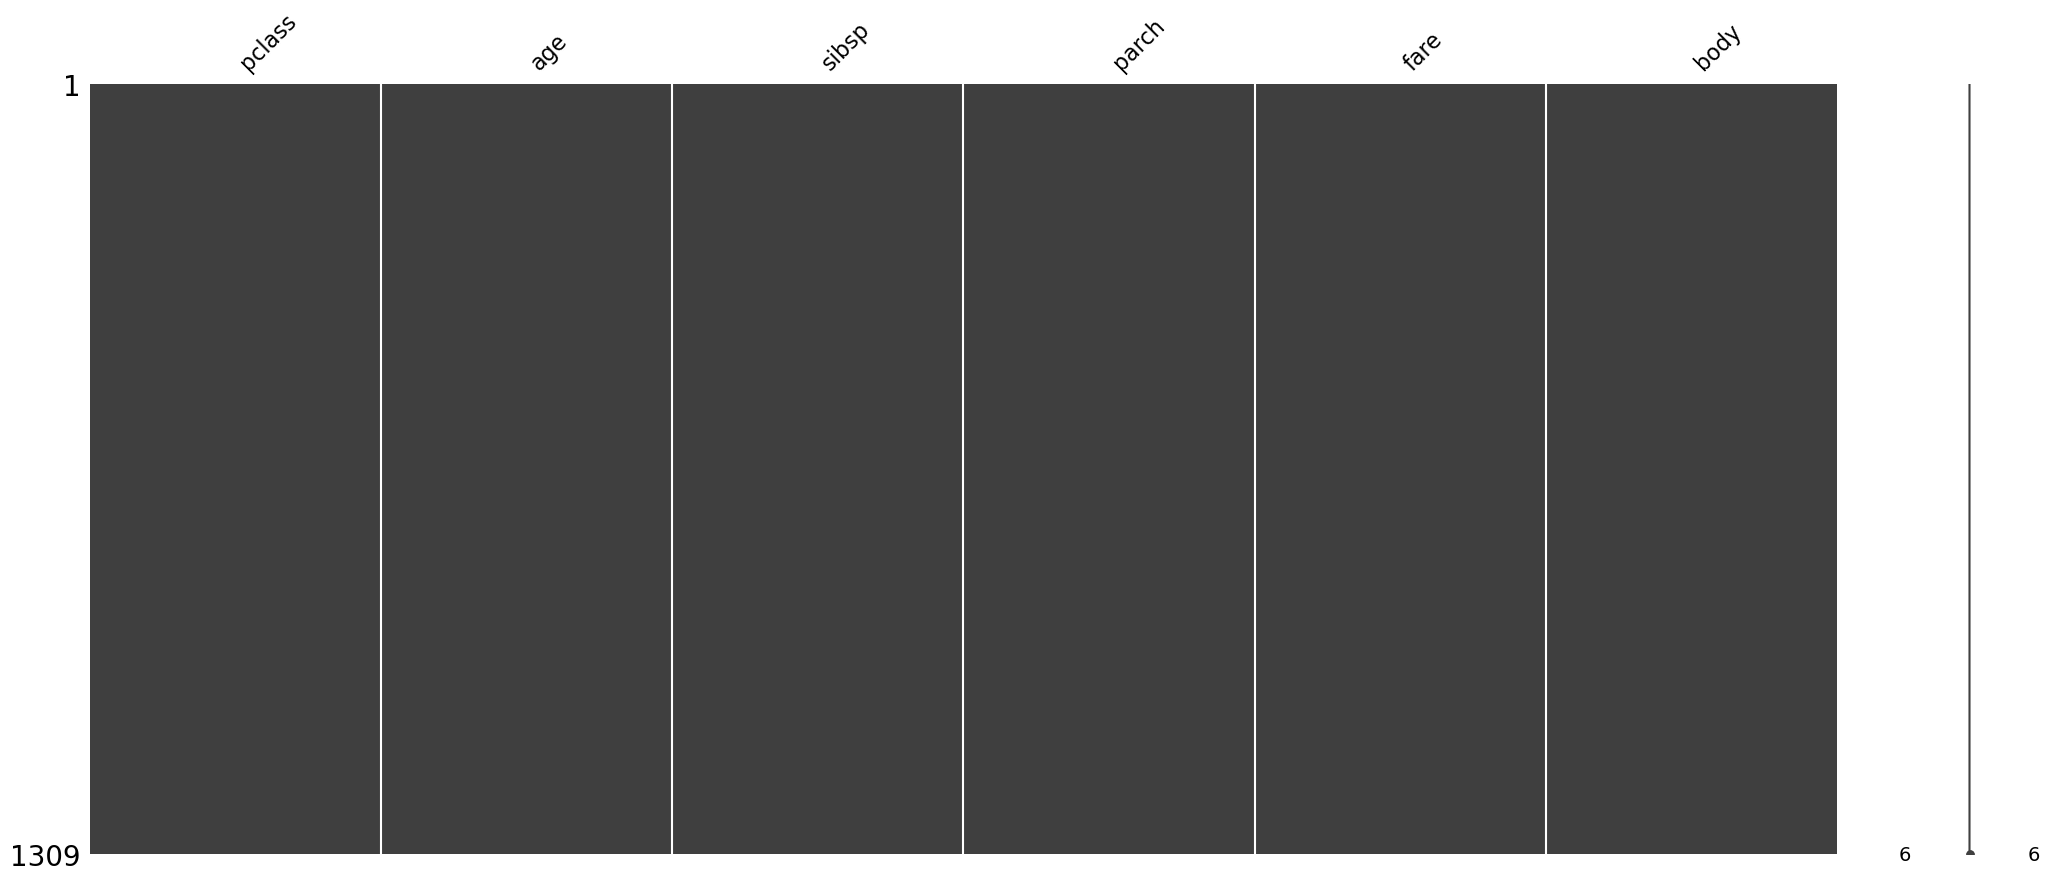

In [12]:
msno.matrix(titanic_imputed)

Transformados los datos con **IterativeImputer**, volvemos a generar el **gráfico de matriz de valores nulos**. El resultado muestra que ya no hay datos faltantes en la nueva base de datos creada, lo que permite realizar análisis con mayor calidad, ya que no existen datos faltantes que puedan afectar los resultados.